In [1]:
import scanpy as sc
import anndata as ad

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [4]:
import numpy as np

from matplotlib import rcParams
FIGSIZE = (6, 6)
rcParams["figure.figsize"] = FIGSIZE


In [5]:
DATA_PATH = '/projectnb/czlab/A00/ycliu/scRNA_integration_benchmark_datasets/Endometrium35K/'

OUTPUT_PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/inte_outputs/Endometrium35K/'

UMAP_PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/inte_outputs/Endometrium35K_UMAP_plots/'

DOWNSTREAM_PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/inte_outputs/Endometrium35K_Downstream_plots/'

# Load data

In [38]:
adata = ad.read_h5ad(OUTPUT_PATH + 'scDiffusion_integration.h5ad')



import numpy as np

# Count occurrences of each cell type
celltype_counts = adata.obs['celltype'].value_counts()

# Find cell types with at least 50 cells
valid_celltypes = celltype_counts[celltype_counts >= 50].index

# Filter the adata object
adata = adata[adata.obs['celltype'].isin(valid_celltypes)].copy()

adata

AnnData object with n_obs × n_vars = 34658 × 2000
    obs: 'n_genes', 'sample', 'library', 'Processing', 'Treatment', '10x kit', 'percent_mito', 'n_counts', 'scrublet_score', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'phase', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology', 'celltype', 'lineage', 'label_long', 'batch', 'incoming_counts', 'outgoing_counts'
    var: 'gene_ids-0-Fonseca', 'feature_types-0-Fonseca', 'n_cells-0-Fonseca', 'gene_ids-1-Fonseca', 'feature_types-1-Fonseca', 'n_cells-1-Fonseca', 'gene_ids-2-Fonseca', 'feature_types-2-Fonseca', 'n_cells-2-Fonseca', 'gene_ids-3-Fonseca', 'feature_types-3-Fonseca', 'n_cells-3-Fonseca', 'gene_ids-4-Fonseca', 'feature_types-4-Fonseca', 'n_cells-4-Fonseca', 'gene_ids-5-Fonseca', 'feature_types-5-Fonseca', 'n_cells-5-Fonseca', 'gene_ids-6-Fonseca', 'feature_types-6-Fonseca', 'n_cells-6-Fonseca', 'MT-Fonseca', 'n_cells_by_counts-Fonseca', 'mea

# UMAP plots

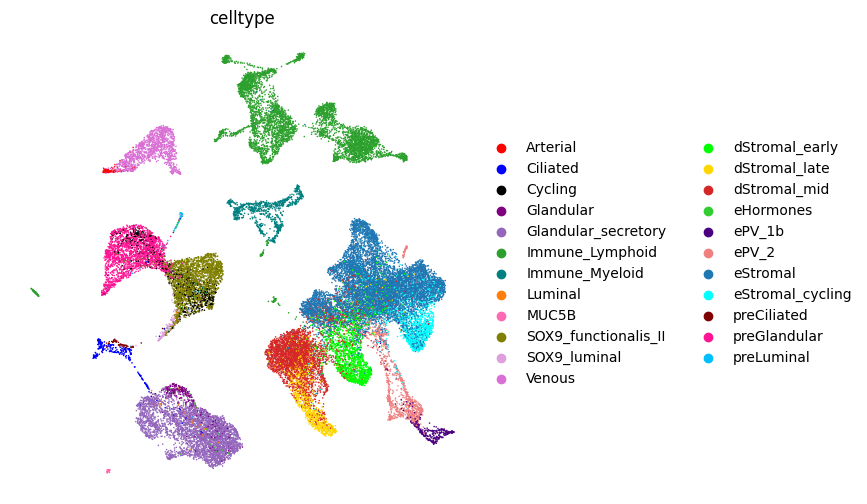

In [39]:
sc.pl.umap(adata, color=['celltype'], frameon=False, 
               #legend_loc = 'right',
               legend_fontsize = 10,
               size=5)

# Clustering

In [40]:
adata_1 = adata[adata.obs['lineage']=='Mesenchymal']

In [47]:
adata_1 = adata_1[adata_1.obs['celltype'].isin(['eStromal_cycling', 'eStromal', 'dStromal_early', 
                                                'dStromal_mid', 'dStromal_late'])].copy()

In [50]:
adata_1.raw.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 49781516 stored elements and shape (16514, 17736)>

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


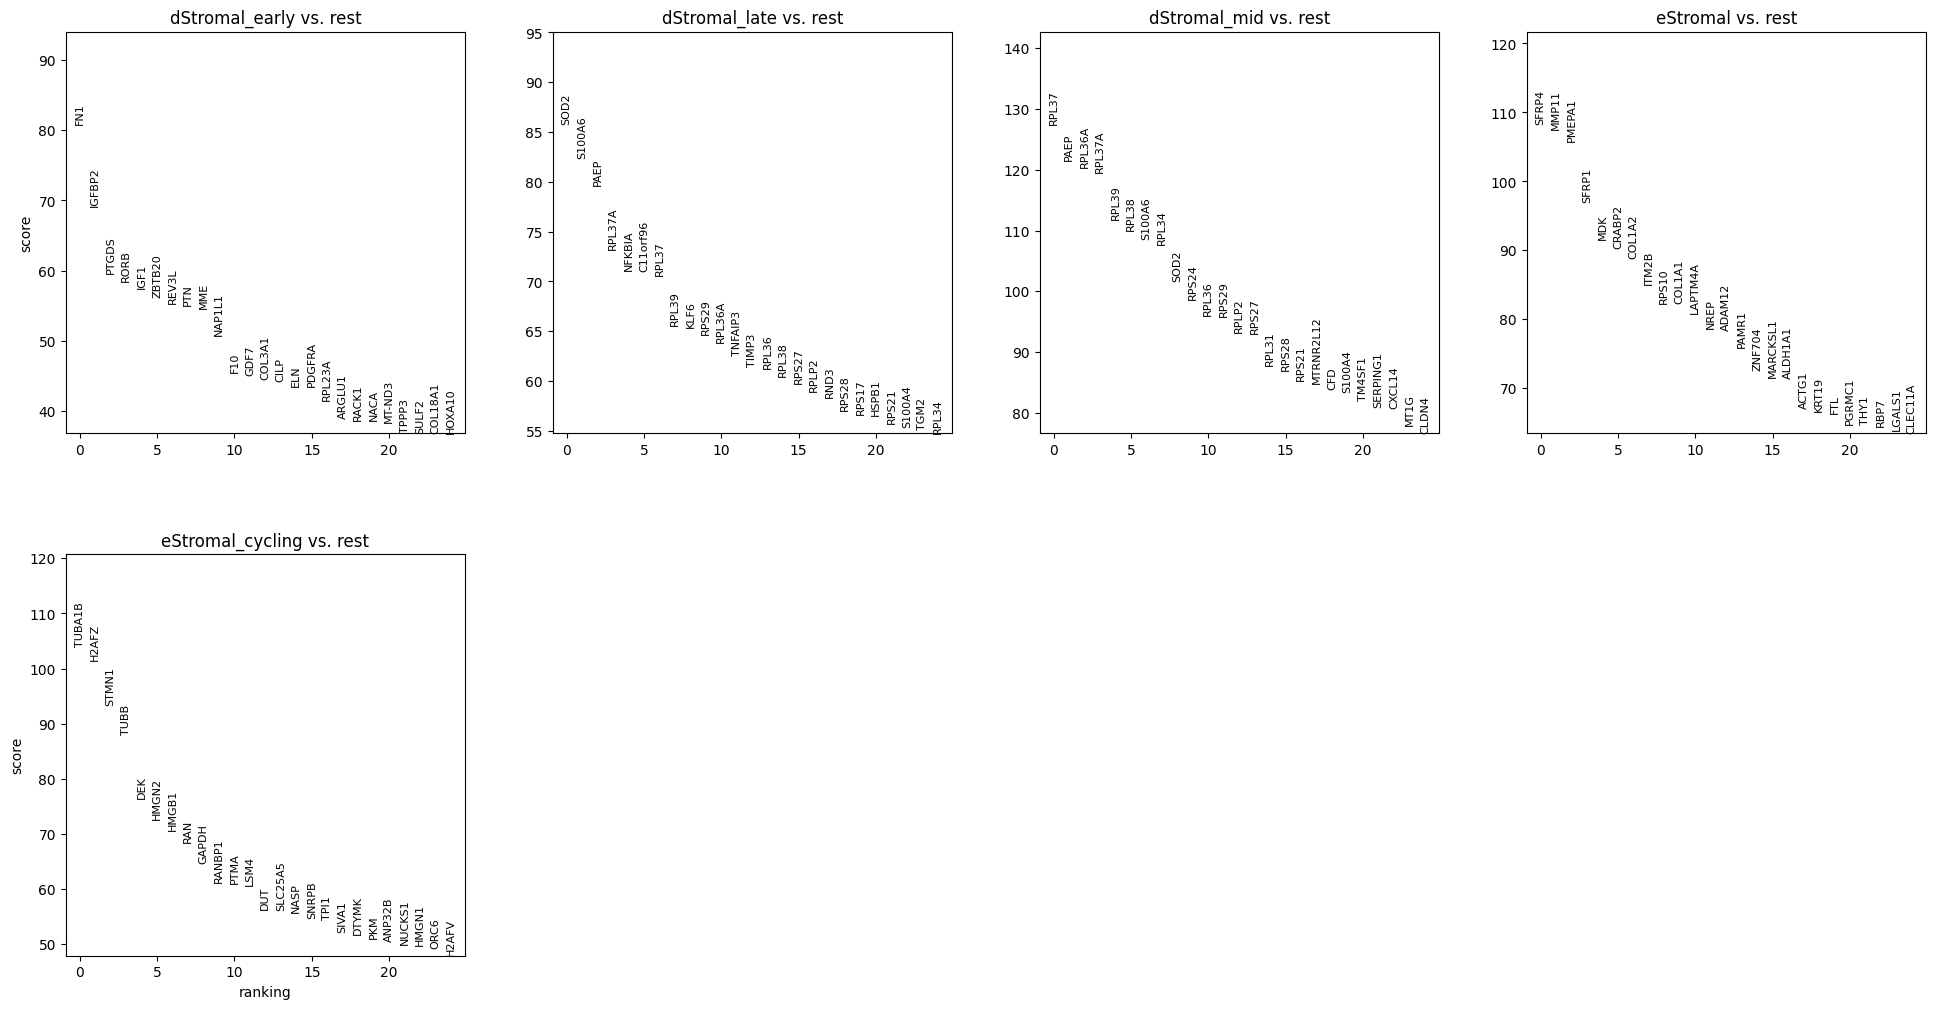

In [52]:
sc.tl.rank_genes_groups(adata_1, 'celltype', method='t-test')
sc.pl.rank_genes_groups(adata_1, n_genes=25, sharey=False)

In [55]:
import pandas as pd

# Assume adata is your AnnData object with rank_genes_groups computed
result = adata_1.uns['rank_genes_groups']
groups = result['names'].dtype.names  # all group names

# Convert to DataFrame
ranked_genes = pd.DataFrame(
    {group + '_' + key: result[key][group]
     for group in groups for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges', 'scores']}
)

ranked_genes

# Save to CSV
# ranked_genes.to_csv('rank_genes_groups.csv')

,dStromal_early_names,dStromal_early_pvals,dStromal_early_pvals_adj,dStromal_early_logfoldchanges,dStromal_early_scores,dStromal_late_names,dStromal_late_pvals,dStromal_late_pvals_adj,dStromal_late_logfoldchanges,dStromal_late_scores,...,eStromal_names,eStromal_pvals,eStromal_pvals_adj,eStromal_logfoldchanges,eStromal_scores,eStromal_cycling_names,eStromal_cycling_pvals,eStromal_cycling_pvals_adj,eStromal_cycling_logfoldchanges,eStromal_cycling_scores
0,FN1,0.0,0.0,3.135267,80.849464,SOD2,0.0,0.0,3.046844,85.763336,...,SFRP4,0.0,0.0,3.596081,108.259560,TUBA1B,0.0,0.0,3.291492,103.972855
1,IGFBP2,0.0,0.0,1.841708,69.210976,S100A6,0.0,0.0,2.464901,82.309151,...,MMP11,0.0,0.0,3.852955,107.539597,H2AFZ,0.0,0.0,3.304660,101.493797
2,PTGDS,0.0,0.0,2.593189,59.557667,PAEP,0.0,0.0,4.100890,79.607452,...,PMEPA1,0.0,0.0,2.484915,105.786209,STMN1,0.0,0.0,3.165100,93.373619
3,RORB,0.0,0.0,1.990587,58.425911,RPL37A,0.0,0.0,1.177003,73.202271,...,SFRP1,0.0,0.0,2.734442,97.018738,TUBB,0.0,0.0,2.295687,87.982597
4,IGF1,0.0,0.0,1.290101,57.501480,NFKBIA,0.0,0.0,2.618746,71.091507,...,MDK,0.0,0.0,1.700112,91.575684,DEK,0.0,0.0,2.353244,76.415207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17731,MYL6,0.0,0.0,-1.017718,-56.726017,NREP,0.0,0.0,-2.932779,-65.272392,...,RPL37A,0.0,0.0,-1.044678,-80.780266,RPL37A,0.0,0.0,-0.966984,-50.688282
17732,ACTA2,0.0,0.0,-2.636060,-57.787205,SFRP1,0.0,0.0,-3.506185,-69.415512,...,RPL39,0.0,0.0,-0.914639,-81.677567,RPL37,0.0,0.0,-0.985563,-51.146080
17733,SFRP1,0.0,0.0,-2.636715,-61.055820,RBP7,0.0,0.0,-3.874137,-69.483467,...,RPL37,0.0,0.0,-1.054309,-84.241638,S100A6,0.0,0.0,-1.785072,-51.217808
17734,MMP11,0.0,0.0,-3.370098,-62.372269,SFRP4,0.0,0.0,-4.650004,-78.998863,...,RPL36A,0.0,0.0,-1.244407,-85.709404,RPS27,0.0,0.0,-0.863798,-53.721027


In [44]:
import pandas as pd
import numpy as np

clustering_labels = pd.read_csv(OUTPUT_PATH+'Mesenchymal_scDiffusion_clustering.csv', header=None)
adata_1.obs['scDiffusion'] = np.array(clustering_labels, dtype=str)

clustering_labels = pd.read_csv(OUTPUT_PATH+'Mesenchymal_Harmony_clustering.csv', header=None)
adata_1.obs['Harmony'] = np.array(clustering_labels, dtype=str)

clustering_labels = pd.read_csv(OUTPUT_PATH+'Mesenchymal_CellANOVA_clustering.csv', header=None)
adata_1.obs['CellANOVA'] = np.array(clustering_labels, dtype=str)

clustering_labels = pd.read_csv(OUTPUT_PATH+'Mesenchymal_Unintegrated_clustering.csv', header=None)
adata_1.obs['Unintegrated'] = np.array(clustering_labels, dtype=str)

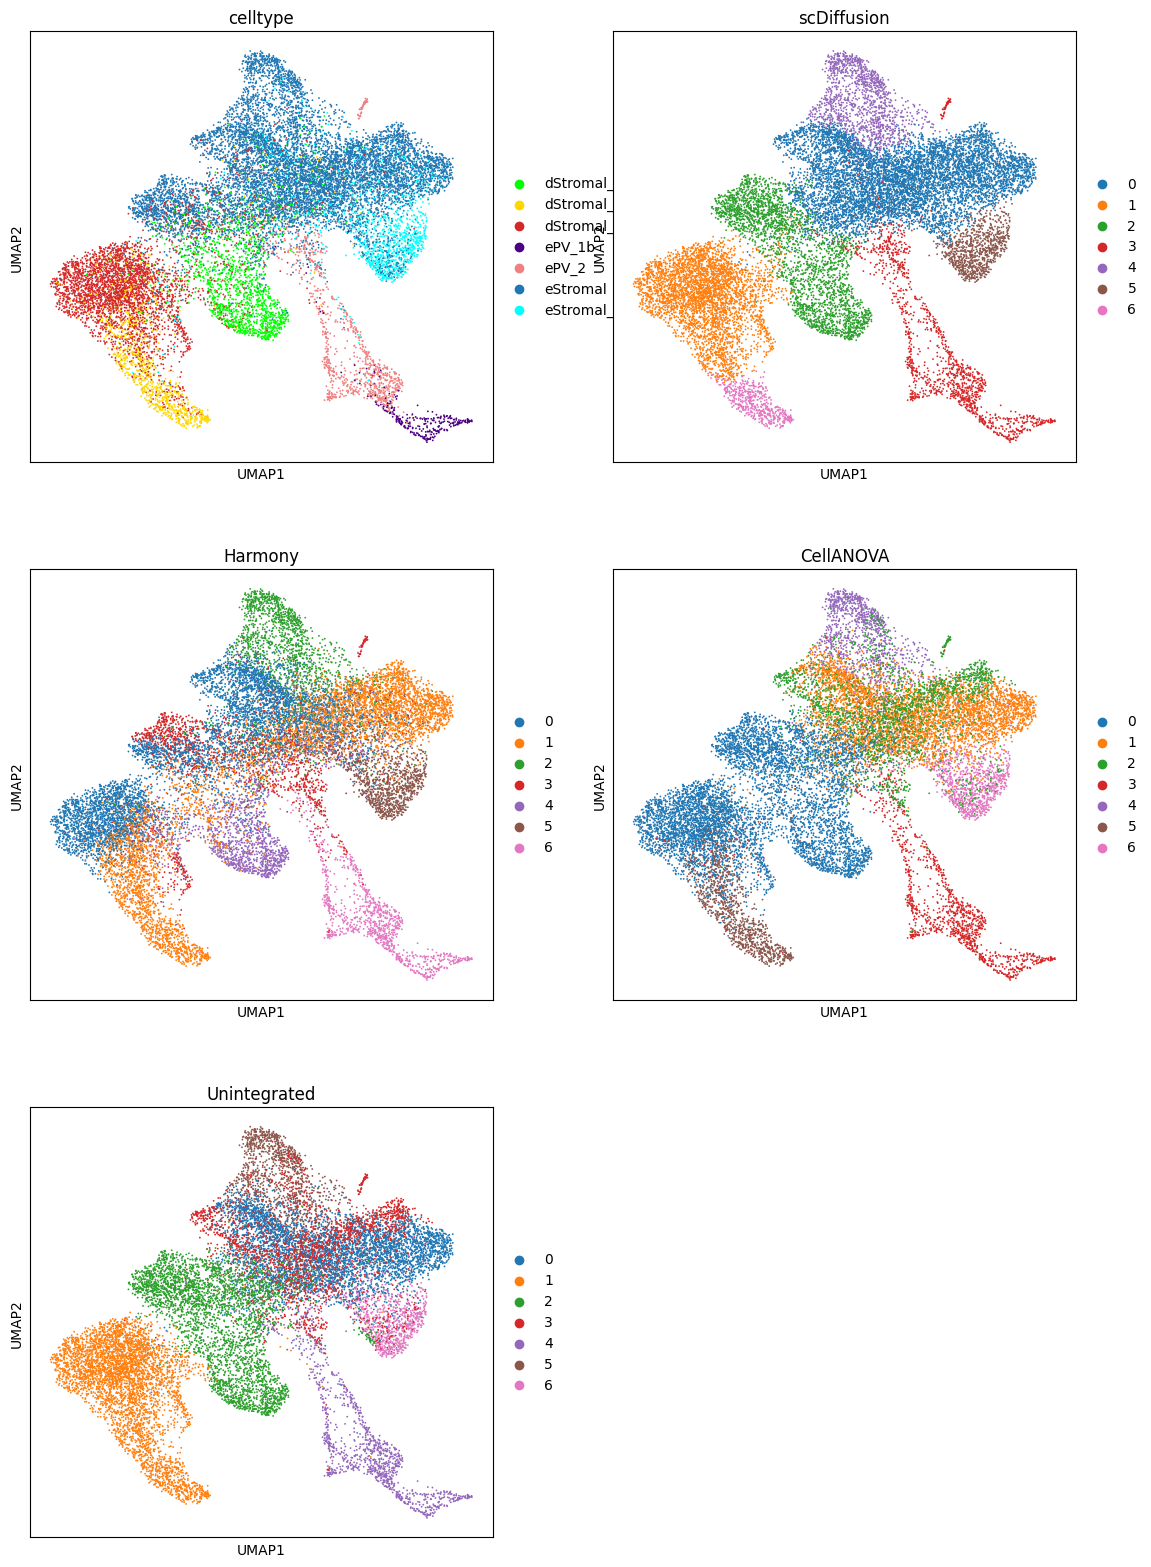

In [46]:
sc.pl.umap(adata_1, color=['celltype','scDiffusion', 'Harmony', 'CellANOVA', 'Unintegrated'], ncols=2)

In [41]:
# import numpy as np

# celltype_labels = np.array(adata_1.obs['celltype'])

# np.savetxt(OUTPUT_PATH+'Mesenchymal_Harmony_celltypes.csv', celltype_labels, delimiter='\t', fmt='%s')

# clustering_labels = np.array(adata_1.obs['leiden'])

# np.savetxt(OUTPUT_PATH+'Mesenchymal_Harmony_clustering.csv', clustering_labels, delimiter='\t', fmt='%s')

In [21]:
clustering_labels

,0
0,1
1,1
2,1
3,1
4,2
...,...
17823,1
17824,4
17825,1
17826,2


## Evaluation

In [38]:
import sklearn.metrics as mt

def evaluate_clustering(cluster, benchmark_labels):
    
    adjusted_rand_score = mt.adjusted_rand_score(cluster, benchmark_labels)
    normalized_mutual_info_score = mt.normalized_mutual_info_score(cluster, benchmark_labels)
    fowlkes_mallows_score = mt.fowlkes_mallows_score(cluster, benchmark_labels)
    
    average = (adjusted_rand_score + normalized_mutual_info_score + fowlkes_mallows_score)/3
    
    return "%.3f" % adjusted_rand_score, "%.3f" % normalized_mutual_info_score, "%.3f" % fowlkes_mallows_score, "%.3f" % average

In [39]:
evaluate_clustering(adata_1.obs['leiden'], adata_1.obs['celltype'])

('0.121', '0.287', '0.355', '0.254')

# Trajectory

In [7]:
adata_1 = adata[adata.obs['lineage']=='Mesenchymal']

adata_1 = adata_1[adata_1.obs['celltype'].isin(['eStromal', 'dStromal_mid', 'eStromal_cycling', 
                                                'dStromal_late','dStromal_early'])]


In [20]:
adata_2 = adata_1.copy()

import numpy as np

# Extract UMAP coordinates
umap_coords = adata_2.obsm["X_umap"]

# Find the index of the lowest Y-coordinate
lowest_idx = np.argmin(umap_coords[:, 1])

# Get the corresponding cell name (index from adata.obs)
lowest_cell = adata_2.obs.index[lowest_idx]

lowest_cell

adata_2 = adata_2[adata_2.obs.index != lowest_cell].copy()

In [8]:
sc.pp.neighbors(adata_1, use_rep='X_pca_harmony', n_neighbors=100, n_pcs=50)

computing neighbors


/usr2/postdoc/ycliu137/.conda/envs/diffusion_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)


In [9]:
sc.tl.paga(adata_1, groups='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


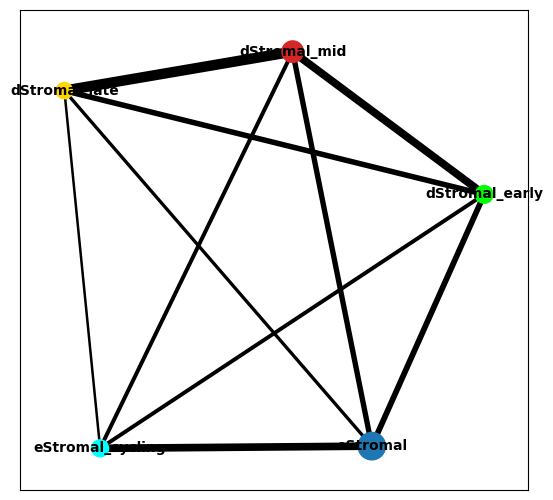

In [10]:
sc.pl.paga(adata_1, plot=True, solid_edges='connectivities')

--> added 'pos', the PAGA positions (adata.uns['paga'])


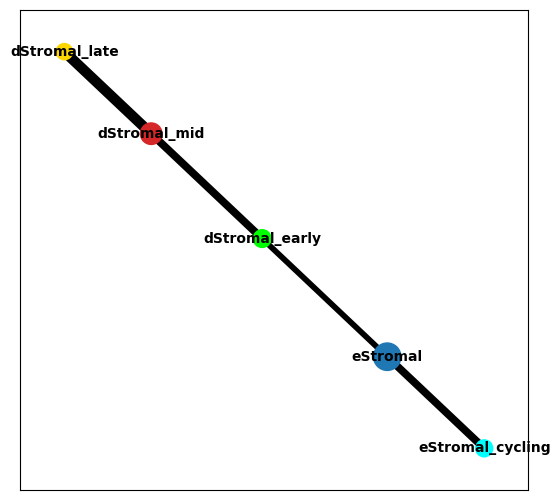

In [11]:
sc.pl.paga(adata_1, plot=True, solid_edges='connectivities_tree')

In [12]:
import numpy

def get_community(adata, use_groups='labels', community_name='community'):
    
    groups = adata.obs[use_groups].astype(str)
    community_size = {}
    community_component = {}
    community_keys = groups.unique()
    
    for group_name in community_keys:
        community_component[group_name] = numpy.where(groups == group_name)[0]
        community_size[group_name] = len(community_component[group_name])/len(groups)
    
    adata.uns[community_name] = {}
    adata.uns[community_name]['use_groups'] = use_groups
    adata.uns[community_name]['keys'] = community_keys
    adata.uns[community_name]['component'] = community_component
    adata.uns[community_name]['size'] = community_size


def community_umap(adata, use_umap='X_umap', use_community='community'):
    
    groups = adata.obs[adata.uns[use_community]['use_groups']].astype(str)
    
    feature_umap = adata.obsm[use_umap]
    
    community_umap = {}
    array_umap = []

    for group_name in adata.uns[use_community]['keys']:
        group_umap = feature_umap[numpy.where(groups == group_name)[0], :]
        community_umap[group_name] = group_umap.mean(axis=0)
        array_umap.append(community_umap[group_name])
    
    adata.uns[use_community]['pos_dict'] = community_umap
    adata.uns[use_community]['pos_array'] = numpy.array(array_umap)

    for ii in range(len(adata.uns[use_community]['keys'])):
        group_name = adata.uns[use_community]['keys'][ii]
        adata.uns[use_community]['pos_dict'][group_name] = adata.uns[use_community]['pos_array'][ii,:]


In [13]:
get_community(adata_1, use_groups='celltype', community_name='community')
community_umap(adata_1, use_umap='X_umap', use_community='community')

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from utils.utility_fn import unique_colors

custom_colors = {
            "eStromal": "#F2B596",
            "eStromal_cycling": "#D87159",
            "dStromal_early": "#BAD7E6",
            "dStromal_mid": "#76AFD0",
            "dStromal_late": "#1D487F"
            }

def plot_connectivities_V1(adata, adata_other,
                        connection_key = 'connectivities',
                        threshold = None,
                        node_scale = 20000, 
                        node_color = None,
                        edge_scale=2, 
                        edge_color='gray', 
                        node_labels=True,
                        figsize=(10, 10), 
                        font_size=12, 
                        font_weight='bold',
                        title='Connectivities',
                        umap_alpha = 0.1,
                        save_fig=None):

    nodes=adata.uns['community']['keys']
    
    node_color = [custom_colors[cell] for cell in nodes]

    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    for edge in adata.uns[connection_key]:
        if connection_key == 'connectivities':
            G.add_edge(edge[0], edge[1], weight=(1/edge[2]))
        else:
            G.add_edge(edge[0], edge[1], weight= edge[2])

    node_weight = node_weight=adata.uns['community']['size']
    node_size = []
    for node in nodes:
        node_size.append(node_weight[node] * node_scale)
    
    if threshold is not None:
        weights = [w for _, _, w in G.edges(data='weight')]

        max_weight = max(weights)
        min_weight = min(weights)
                 
        threshold = (max_weight - min_weight)*threshold + min_weight
        filtered_edges = [(u, v, w) for u, v, w in G.edges(data='weight') if w >= threshold]
        

        filtered_G = nx.Graph()
        G2 = nx.Graph()
        G2.add_nodes_from(nodes)
        filtered_G.add_weighted_edges_from(filtered_edges)
        G2.add_weighted_edges_from(filtered_edges)

        for node in G.nodes():
            if node not in filtered_G.nodes():
                node_edges = [(u, v, w) for u, v, w in G.edges(node, data='weight')]
                if node_edges:
                    max_edge = max(node_edges, key=lambda x: x[2])
                    filtered_G.add_weighted_edges_from([max_edge])
                    G2.add_weighted_edges_from([max_edge])   
                    
        for edge in adata.uns['trajectory']:
            G2.add_edge(edge[0], edge[1], weight=(1/edge[2]))
        
        G = G2
        
    # Draw the graph
    edge_weights = [d['weight']*edge_scale for (u, v, d) in G.edges(data=True)]

    pos = adata.uns['community']['pos_dict']
    
    if node_color is not None:
        colors = node_color
    else:
        unique_values = np.array(adata.uns['community']['keys'])
        colors = unique_colors(unique_values)
        
        
    ####
    #
    
    
    color_umap = [custom_colors[cell] for cell in adata_other.obs["celltype"]]
    
    G_umap = nx.Graph()
    G_umap.add_nodes_from(list(range(len(color_umap))))
    
    pos_umap = adata_other.obsm['X_umap']
    
    
    
        
    

    plt.figure(figsize=figsize)
    
    nx.draw(G_umap, pos_umap, with_labels=None, width=0, node_size=10, node_color=color_umap, 
            font_size=font_size, font_weight=font_weight, alpha=umap_alpha)
    
    
    
    
    abcdefg = nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color=edge_color)
    
    abcdefg.set_zorder(2)
    
    nx.draw(G, pos, with_labels=node_labels, width=0, node_size=node_size, node_color=colors, 
            font_size=font_size, font_weight=font_weight)
    
    
    plt.title(title)
    
    plt.tight_layout()
    
    if save_fig is not None:
        plt.savefig(save_fig, bbox_inches='tight')
    plt.show()
    

    



In [15]:
import pandas as pd
import scipy.sparse as sp

def get_paga_connectivities(adata, 
                            connect_type='connectivities',
                            label_key='celltype'):
    paga_graph_tree = adata.uns['paga'][connect_type].tocoo()
    # remove symmetric elements
#     mask = paga_graph_tree.row >= paga_graph_tree.col  # Keep elements where row index >= column index
#     paga_graph_tree = sp.coo_matrix((paga_graph_tree.data[mask], (paga_graph_tree.row[mask], paga_graph_tree.col[mask])), shape=paga_graph_tree.shape)

    
    edges_tree = pd.DataFrame({'A': paga_graph_tree.row, 'B': paga_graph_tree.col, 'weight': paga_graph_tree.data})
    edges_tree = edges_tree[edges_tree['weight'] > 0]  # Remove edges with zero weight
    # Map integer indices to cell type labels
    index_to_cell_type = dict(enumerate(adata.obs[label_key].cat.categories))
    edges_tree['A'] = edges_tree['A'].map(index_to_cell_type)
    edges_tree['B'] = edges_tree['B'].map(index_to_cell_type)
    
    return edges_tree

def df_to_traj_list(df):
    
    traj_list = []
    for i, row in df.iterrows():
        traj_list.append((row['A'], row['B'], row['weight']))
        
    return traj_list


In [16]:
df_traj = get_paga_connectivities(adata_1)
paga_list = df_to_traj_list(df_traj)
adata_1.uns['paga_connectivities'] = paga_list

In [17]:
adata_1.uns['community']['pos_dict']

{'eStromal': array([10.76732 , 12.441418], dtype=float32),
 'dStromal_mid': array([11.074559, 10.779167], dtype=float32),
 'eStromal_cycling': array([11.459713, 13.885404], dtype=float32),
 'dStromal_late': array([12.922367 , 10.3054905], dtype=float32),
 'dStromal_early': array([13.005165, 11.74968 ], dtype=float32)}

In [18]:
import numpy as ny

adata_1.uns['community']['pos_dict'] = {'eStromal': np.array([9.76732 , 12.441418]),
 'dStromal_mid': np.array([11.074559, 10.279167]),
 'eStromal_cycling': np.array([11.459713, 14.585404]),
 'dStromal_late': np.array([13.722367 , 9.7054905]),
 'dStromal_early': np.array([13.905165, 11.74968 ])}

In [27]:
import numpy as np

# Extract UMAP coordinates
umap_coords = adata_2.obsm["X_umap"]

# Find the index of the lowest Y-coordinate
lowest_idx = np.argmax(umap_coords[:, 0])

lowest_idx

np.int64(11922)

In [28]:
adata_2.obsm["X_umap"][11922,0]

np.float32(15.411426)

In [31]:
adata_2.obsm["X_umap"][11922,0] = 17.411426

In [ ]:
plot_connectivities_V1(adata_1, adata_other=adata_2,
                       connection_key = 'paga_connectivities',
                        node_scale = 20000, 
                        node_color = adata_1.uns["celltype_colors"],
                        edge_scale=30, 
                        edge_color='gray', 
                        figsize=(10, 5), 
                        font_size=30, 
                        font_weight='bold',
                        title=None,
                        umap_alpha = 0.07,
                        save_fig=DOWNSTREAM_PATH+'Mesenchymal_Harmony_trajectory.pdf')

In [67]:
df_traj.to_csv(OUTPUT_PATH+'Mesenchymal_Harmony_trajectory.csv')